In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
columbia = pd.read_csv('Data/LandsatTemperature/columbia_clean.csv')

# Replace "NULL" with NaN and convert LandTempC, NDVI, WaterTempC, ClimateClass, RKm to float
columbia = columbia.replace('NULL', np.nan)
columbia['LandTempC'] = columbia['LandTempC'].astype(float)
columbia['NDVI'] = columbia['NDVI'].astype(float)
columbia['WaterTempC'] = columbia['WaterTempC'].astype(float)
columbia['ClimateClass'] = columbia['ClimateClass'].astype(float)
columbia['RKm'] = columbia['RKm'].astype(float)

# Convert Date to datetime
columbia['Date'] = pd.to_datetime(columbia['Date'])

columbia.head()

,ReachID,Date,LandTempC,WaterTempC,NDVI,Mission,Name,ClimateClass,RKm
0,42,2022-02-17,3.94372,5.39979,NaN,L9,Columbia_River_1,9.0,0.0
1,42,2022-03-05,11.78180,6.21907,0.168393,L9,Columbia_River_1,9.0,0.0
2,42,2022-04-06,10.65880,4.34301,0.122964,L9,Columbia_River_1,9.0,0.0
3,42,2022-04-22,18.02620,9.56365,0.113320,L9,Columbia_River_1,9.0,0.0
4,42,2022-05-08,18.19150,11.31710,0.176089,L9,Columbia_River_1,9.0,0.0


In [13]:
# columbia.to_csv('Data/LandsatTemperature/columbia_clean.csv', index=False)

In [14]:
# find the day of the maximum water temperature at RKm 380
columbia[columbia['RKm'] == 380].sort_values('WaterTempC', ascending=False).head(10)

,ReachID,Date,LandTempC,WaterTempC,NDVI,Mission,Name,ClimateClass,RKm
153812,172,2015-07-02,54.1348,28.8136,0.224633,L8,Columbia_River_39,5.0,380.0
153996,172,2021-08-12,46.4290,28.3440,0.191039,L8,Columbia_River_39,5.0,380.0
153995,172,2021-08-03,48.8132,28.2184,0.201109,L8,Columbia_River_39,5.0,380.0
153873,172,2017-08-01,49.3643,27.4371,0.236262,L8,Columbia_River_39,5.0,380.0
153814,172,2015-07-18,50.3121,27.3134,0.212797,L8,Columbia_River_39,5.0,380.0
153696,172,2022-07-29,52.3817,27.3123,0.232474,L9,Columbia_River_39,5.0,380.0
153931,172,2019-08-07,50.6289,27.3094,0.228567,L8,Columbia_River_39,5.0,380.0
153730,172,2023-07-16,55.6233,27.1831,0.216910,L9,Columbia_River_39,5.0,380.0
153841,172,2016-07-29,50.8670,27.0642,0.201046,L8,Columbia_River_39,5.0,380.0
154021,172,2022-07-30,51.8759,26.8099,0.224688,L8,Columbia_River_39,5.0,380.0


In [15]:
columbia[columbia['RKm']==380][columbia['Date'].dt.month.isin([6, 7, 8])].describe()

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_23177/2376461425.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  columbia[columbia['RKm']==380][columbia['Date'].dt.month.isin([6, 7, 8])].describe()


,ReachID,LandTempC,WaterTempC,NDVI,ClimateClass,RKm
count,131.0,131.000000,128.000000,131.000000,131.0,131.0
mean,172.0,43.688227,23.390665,0.225169,5.0,380.0
std,0.0,6.354155,3.243402,0.037890,0.0,0.0
min,172.0,24.061200,10.897300,-0.044928,5.0,380.0
25%,172.0,41.002450,21.653975,0.212830,5.0,380.0
50%,172.0,44.626500,24.437400,0.224633,5.0,380.0
75%,172.0,47.784550,25.719700,0.244121,5.0,380.0
max,172.0,55.623300,28.813600,0.330230,5.0,380.0


Text(0.5, 1.0, 'Landsat Water Temperature (All Months)')

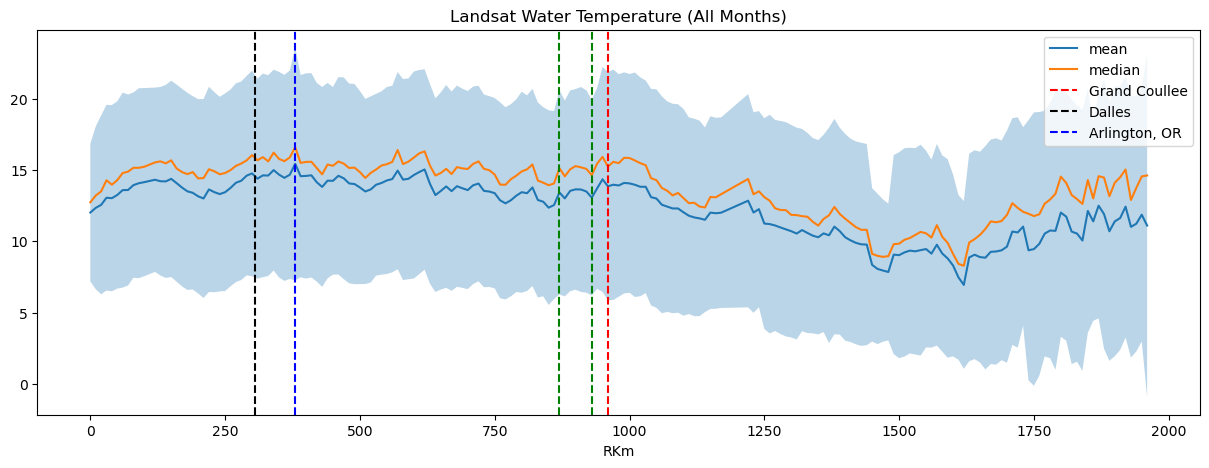

In [16]:
# group by RKm and calculate the mean, std, median, min, max of LandTempC, WaterTempC, ClimateClass
# operation on summer months only
# co = columbia['Date'].dt.month.isin([6, 7, 8])
co = columbia['Date'].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
col_stats = columbia[co].groupby('RKm').agg({'LandTempC': ['mean', 'std', 'median', 'min', 'max'], 'WaterTempC': ['mean', 'std', 'median', 'min', 'max'], 'ClimateClass': ['mean', 'std', 'median', 'min', 'max']})

fig, ax = plt.subplots(figsize=(15, 5))
col_stats['WaterTempC'][['mean','median',]].plot(ax=ax)
ax.fill_between(col_stats.index, col_stats['WaterTempC']['mean'] - col_stats['WaterTempC']['std'], col_stats['WaterTempC']['mean'] + col_stats['WaterTempC']['std'], alpha=0.3)
ax.axvline(x=960, color='r', linestyle='--', label='Grand Coullee')
ax.axvline(x=305, color='k', linestyle='--', label='Dalles')
ax.axvline(x=380, color='b', linestyle='--', label='Arlington, OR')
ax.axvline(x=930, color='g', linestyle='--')
ax.axvline(x=870, color='g', linestyle='--')
ax.legend()

ax.set_title('Landsat Water Temperature (All Months)')

Text(0.5, 1.0, 'Columbia River Water Temperature (June, July, August)')

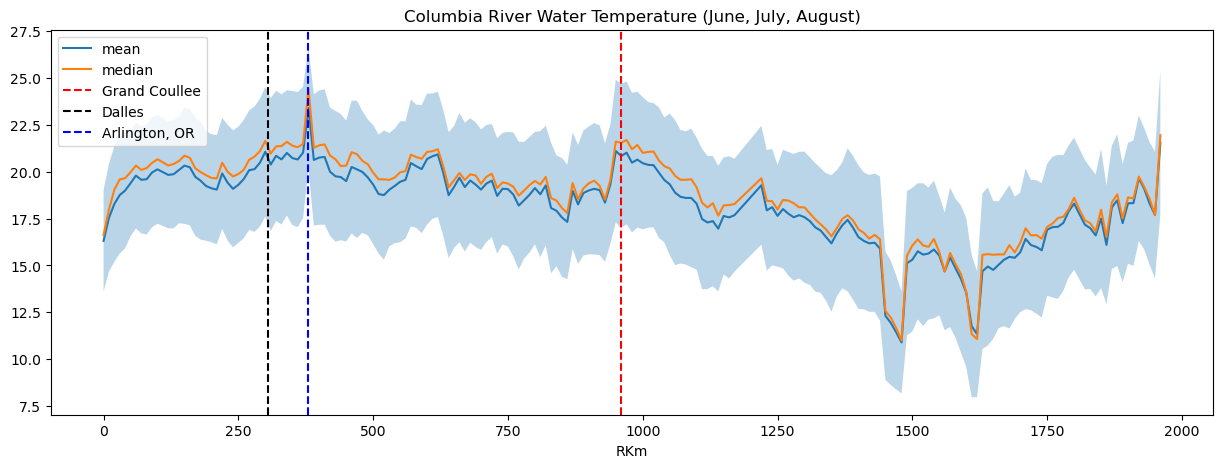

In [17]:
# group by RKm and calculate the mean, std, median, min, max of LandTempC, WaterTempC, ClimateClass
# operation on summer months only
co = columbia['Date'].dt.month.isin([6, 7, 8])
col_stats = columbia[co].groupby('RKm').agg({'LandTempC': ['mean', 'std', 'median', 'min', 'max'], 'WaterTempC': ['mean', 'std', 'median', 'min', 'max'], 'ClimateClass': ['mean', 'std', 'median', 'min', 'max']})

fig, ax = plt.subplots(figsize=(15, 5))
col_stats['WaterTempC'][['mean','median',]].plot(ax=ax)
ax.fill_between(col_stats.index, col_stats['WaterTempC']['mean'] - col_stats['WaterTempC']['std'], col_stats['WaterTempC']['mean'] + col_stats['WaterTempC']['std'], alpha=0.3)
ax.axvline(x=960, color='r', linestyle='--', label='Grand Coullee')
ax.axvline(x=305, color='k', linestyle='--', label='Dalles')
ax.axvline(x=380, color='b', linestyle='--', label='Arlington, OR')
# ax.axvline(x=930, color='g', linestyle='--')
# ax.axvline(x=870, color='g', linestyle='--')
ax.legend()

ax.set_title('Columbia River Water Temperature (June, July, August)')

Text(0.5, 1.0, 'Columbia River Water Temperature (March, April, May)')

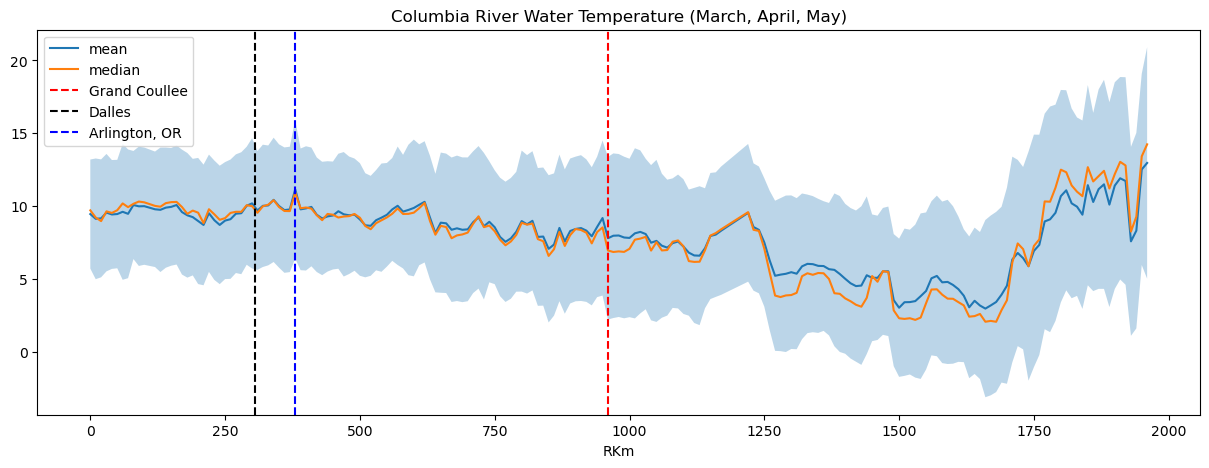

In [18]:
# group by RKm and calculate the mean, std, median, min, max of LandTempC, WaterTempC, ClimateClass
# operation on spring months only
co = columbia['Date'].dt.month.isin([3, 4, 5])
col_stats = columbia[co].groupby('RKm').agg({'LandTempC': ['mean', 'std', 'median', 'min', 'max'], 'WaterTempC': ['mean', 'std', 'median', 'min', 'max'], 'ClimateClass': ['mean', 'std', 'median', 'min', 'max']})

fig, ax = plt.subplots(figsize=(15, 5))
col_stats['WaterTempC'][['mean','median',]].plot(ax=ax)
ax.fill_between(col_stats.index, col_stats['WaterTempC']['mean'] - col_stats['WaterTempC']['std'], col_stats['WaterTempC']['mean'] + col_stats['WaterTempC']['std'], alpha=0.3)
ax.axvline(x=960, color='r', linestyle='--', label='Grand Coullee')
ax.axvline(x=305, color='k', linestyle='--', label='Dalles')
ax.axvline(x=380, color='b', linestyle='--', label='Arlington, OR')
# ax.axvline(x=930, color='g', linestyle='--')
# ax.axvline(x=870, color='g', linestyle='--')
ax.legend()

ax.set_title('Columbia River Water Temperature (March, April, May)')

Text(0.5, 1.0, 'Columbia River Water Temperature (December, January, February)')

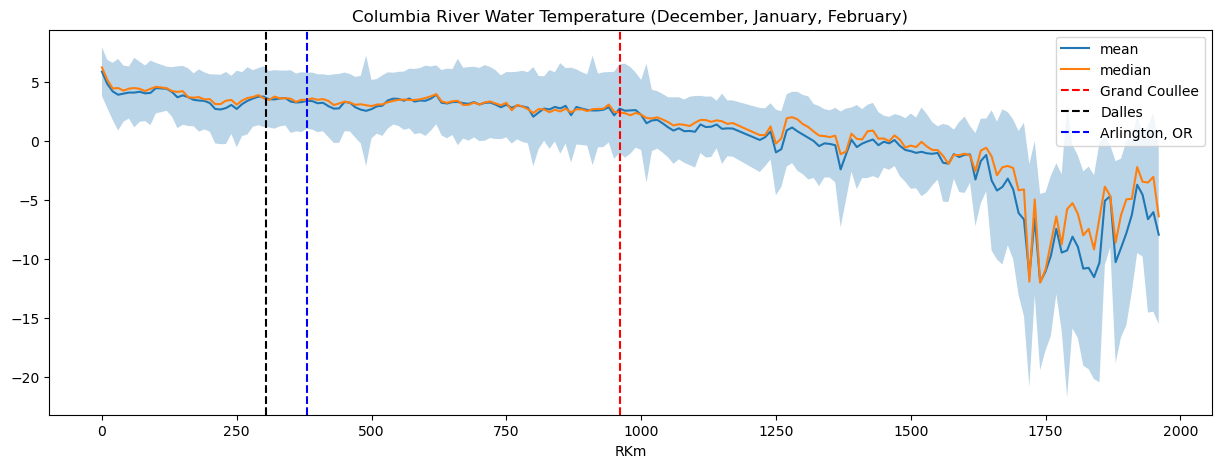

In [19]:
# group by RKm and calculate the mean, std, median, min, max of LandTempC, WaterTempC, ClimateClass
# operation on spring months only
co = columbia['Date'].dt.month.isin([12, 1, 2])
col_stats = columbia[co].groupby('RKm').agg({'LandTempC': ['mean', 'std', 'median', 'min', 'max'], 'WaterTempC': ['mean', 'std', 'median', 'min', 'max'], 'ClimateClass': ['mean', 'std', 'median', 'min', 'max']})

fig, ax = plt.subplots(figsize=(15, 5))
col_stats['WaterTempC'][['mean','median',]].plot(ax=ax)
ax.fill_between(col_stats.index, col_stats['WaterTempC']['mean'] - col_stats['WaterTempC']['std'], col_stats['WaterTempC']['mean'] + col_stats['WaterTempC']['std'], alpha=0.3)
ax.axvline(x=960, color='r', linestyle='--', label='Grand Coullee')
ax.axvline(x=305, color='k', linestyle='--', label='Dalles')
ax.axvline(x=380, color='b', linestyle='--', label='Arlington, OR')
# ax.axvline(x=930, color='g', linestyle='--')
# ax.axvline(x=870, color='g', linestyle='--')
ax.legend()

ax.set_title('Columbia River Water Temperature (December, January, February)')

Text(0.5, 1.0, 'Columbia River Water Temperature (September, October, November)')

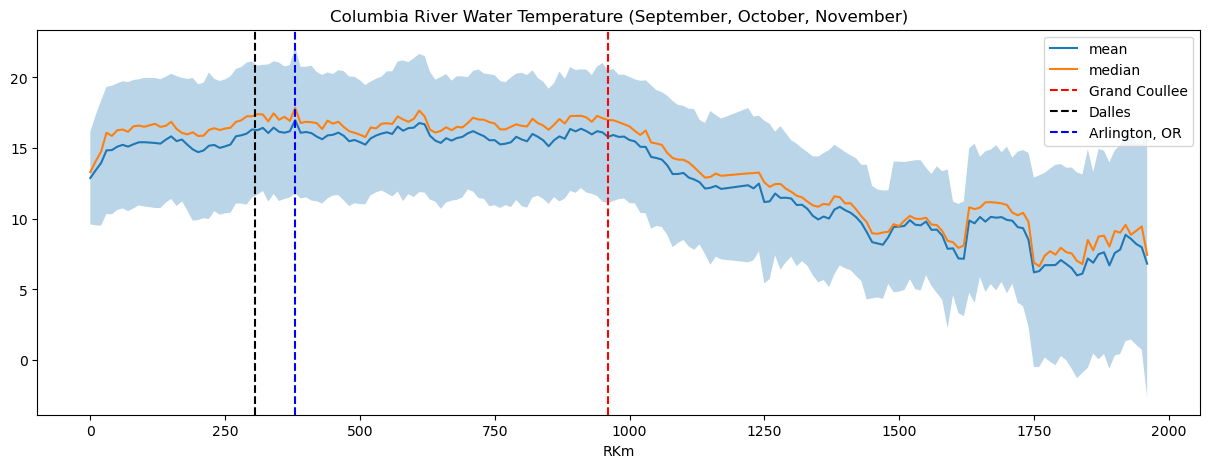

In [20]:
# group by RKm and calculate the mean, std, median, min, max of LandTempC, WaterTempC, ClimateClass
# operation on spring months only
co = columbia['Date'].dt.month.isin([9, 10, 11])
col_stats = columbia[co].groupby('RKm').agg({'LandTempC': ['mean', 'std', 'median', 'min', 'max'], 'WaterTempC': ['mean', 'std', 'median', 'min', 'max'], 'ClimateClass': ['mean', 'std', 'median', 'min', 'max']})

fig, ax = plt.subplots(figsize=(15, 5))
col_stats['WaterTempC'][['mean','median',]].plot(ax=ax)
ax.fill_between(col_stats.index, col_stats['WaterTempC']['mean'] - col_stats['WaterTempC']['std'], col_stats['WaterTempC']['mean'] + col_stats['WaterTempC']['std'], alpha=0.3)
ax.axvline(x=960, color='r', linestyle='--', label='Grand Coullee')
ax.axvline(x=305, color='k', linestyle='--', label='Dalles')
ax.axvline(x=380, color='b', linestyle='--', label='Arlington, OR')
# ax.axvline(x=930, color='g', linestyle='--')
# ax.axvline(x=870, color='g', linestyle='--')
ax.legend()

ax.set_title('Columbia River Water Temperature (September, October, November)')

In [89]:
arlignton = columbia[columbia['RKm'] == 380]
arlignton

,ReachID,Date,LandTempC,WaterTempC,NDVI,Mission,Name,ClimateClass,RKm
153674,172,2021-11-04,14.46440,12.03380,0.306632,L9,Columbia_River_39,5.0,380.0
153675,172,2021-11-16,10.56200,10.72090,0.316215,L9,Columbia_River_39,5.0,380.0
153676,172,2021-12-10,8.77849,8.28440,0.400285,L9,Columbia_River_39,5.0,380.0
153677,172,2021-12-26,2.45209,2.90599,0.353619,L9,Columbia_River_39,5.0,380.0
153678,172,2022-01-18,7.71775,3.28103,0.384661,L9,Columbia_River_39,5.0,380.0
...,...,...,...,...,...,...,...,...,...
154066,172,2023-12-08,7.52942,7.92291,0.279345,L8,Columbia_River_39,5.0,380.0
154067,172,2024-01-09,2.47011,1.53206,0.349686,L8,Columbia_River_39,5.0,380.0
154068,172,2024-01-16,-8.02751,-1.46786,-0.003991,L8,Columbia_River_39,5.0,380.0
154069,172,2024-01-25,-1.81223,NaN,-0.098816,L8,Columbia_River_39,5.0,380.0


In [92]:
# find the longterm monthly average water temperature at Arlington, OR
arl_longterm = arlignton.groupby(arlignton['Date'].dt.month).agg({'WaterTempC': ['mean', 'std', 'median', 'min', 'max']})

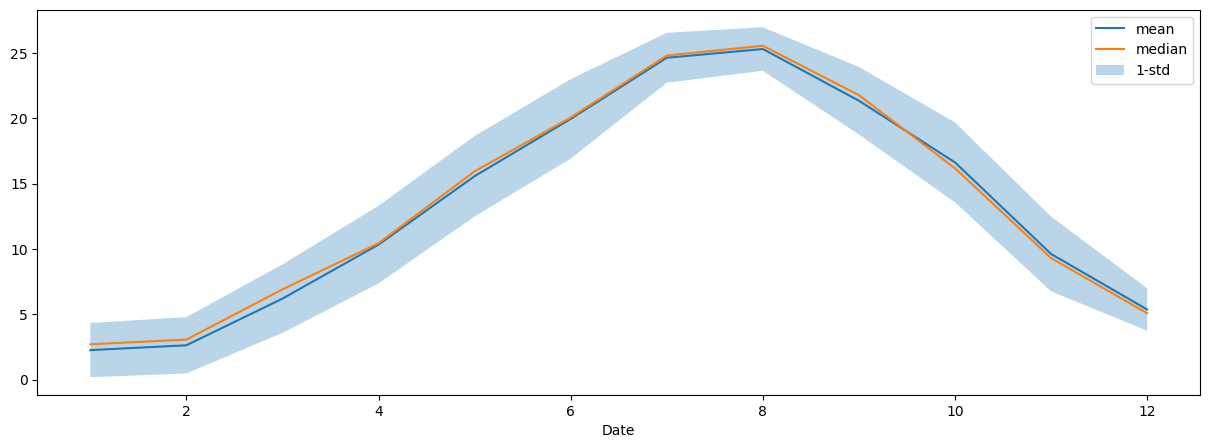

In [95]:
# plot the longterm monthly average water temperature at Arlington, OR
fig, ax = plt.subplots(figsize=(15, 5))
arl_longterm['WaterTempC'][['mean','median']].plot(ax=ax)
ax.fill_between(arl_longterm.index, arl_longterm['WaterTempC']['mean']-arl_longterm['WaterTempC']['std'], arl_longterm['WaterTempC']['mean']+arl_longterm['WaterTempC']['std'], alpha=0.3, label='1-std')
ax.legend()